In [1]:
from transformers import AutoTokenizer
import pandas as pd
from eedi.datasets import make_complete_query
import seaborn as sns

In [2]:
model_names = [
    "sentence-transformers/all-MiniLM-L6-v2",
    "Alibaba-NLP/gte-large-en-v1.5",
    "Salesforce/SFR-Embedding-2_R",
    "Qwen/Qwen2.5-14B",
]
tokenizer = AutoTokenizer.from_pretrained(model_names[3])

In [3]:
df = pd.read_csv("../data/eedi-paraphrased/train.csv")
df["QuestionComplete"] = df.apply(make_complete_query, axis=1)
tokenized_queries = tokenizer(df["QuestionComplete"].tolist())
df["TokenCounts"] = [len(e) for e in tokenized_queries["input_ids"]]

query average 88.45754414859547


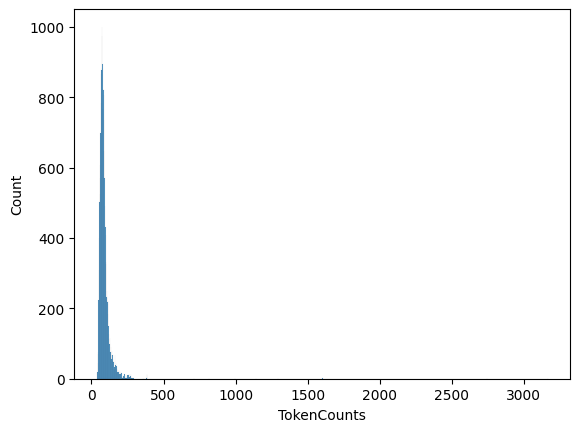

In [4]:
print("query average", df["TokenCounts"].mean())
sns.histplot(df["TokenCounts"]);